In [50]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [51]:
def show_image(img_list):
    plt.figure(figsize=(20,10))
    [plt.subplot(1, len(img_list), i+1) and plt.imshow(img_list[i]) for i in range(len(img_list))]
    plt.show()

# -N? Đọc ảnh

In [52]:
img = Image.open('lena.png')
img_2d = np.array(img)

# 1. Thay đổi độ sáng cho ảnh 

In [53]:
def truncate(img_2d):
    return np.clip(img_2d, 0, 255, out=img_2d)

In [123]:
def change_brightness(img_2d, brightness):
    return truncate(img_2d.astype('int64') + brightness).astype('uint8')

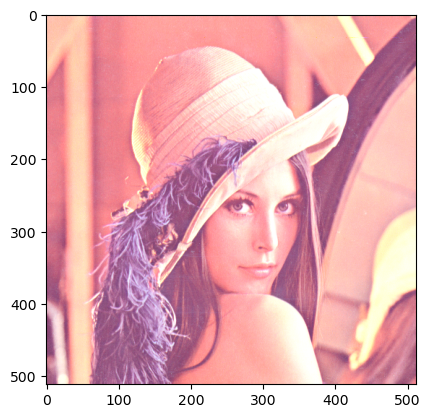

In [124]:
new_img_2d = change_brightness(img_2d, 64)
plt.imshow(new_img_2d)

# 2. Thay đổi độ tương phản của ảnh

In [56]:
def change_contrast(img_2d, contrast):
    factor = float(259 * (contrast + 255)) / (255 * (259 - contrast))
    new_img_2d = truncate(factor * (img_2d.astype('float64') - 128) + 128)
    return new_img_2d.astype('uint8')

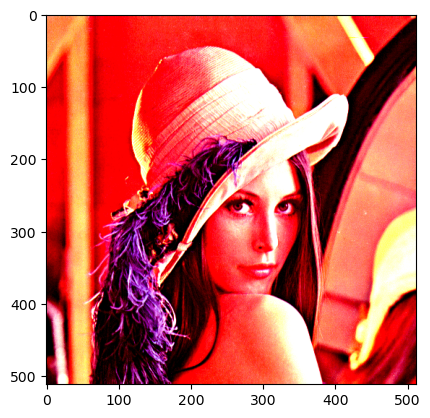

In [57]:
new_img_2d = change_contrast(img_2d, 128)
plt.imshow(new_img_2d)

# 3. Lật ảnh ngang dọc

In [58]:
def flip_image(img_2d, axis):
    return np.flip(img_2d, axis)

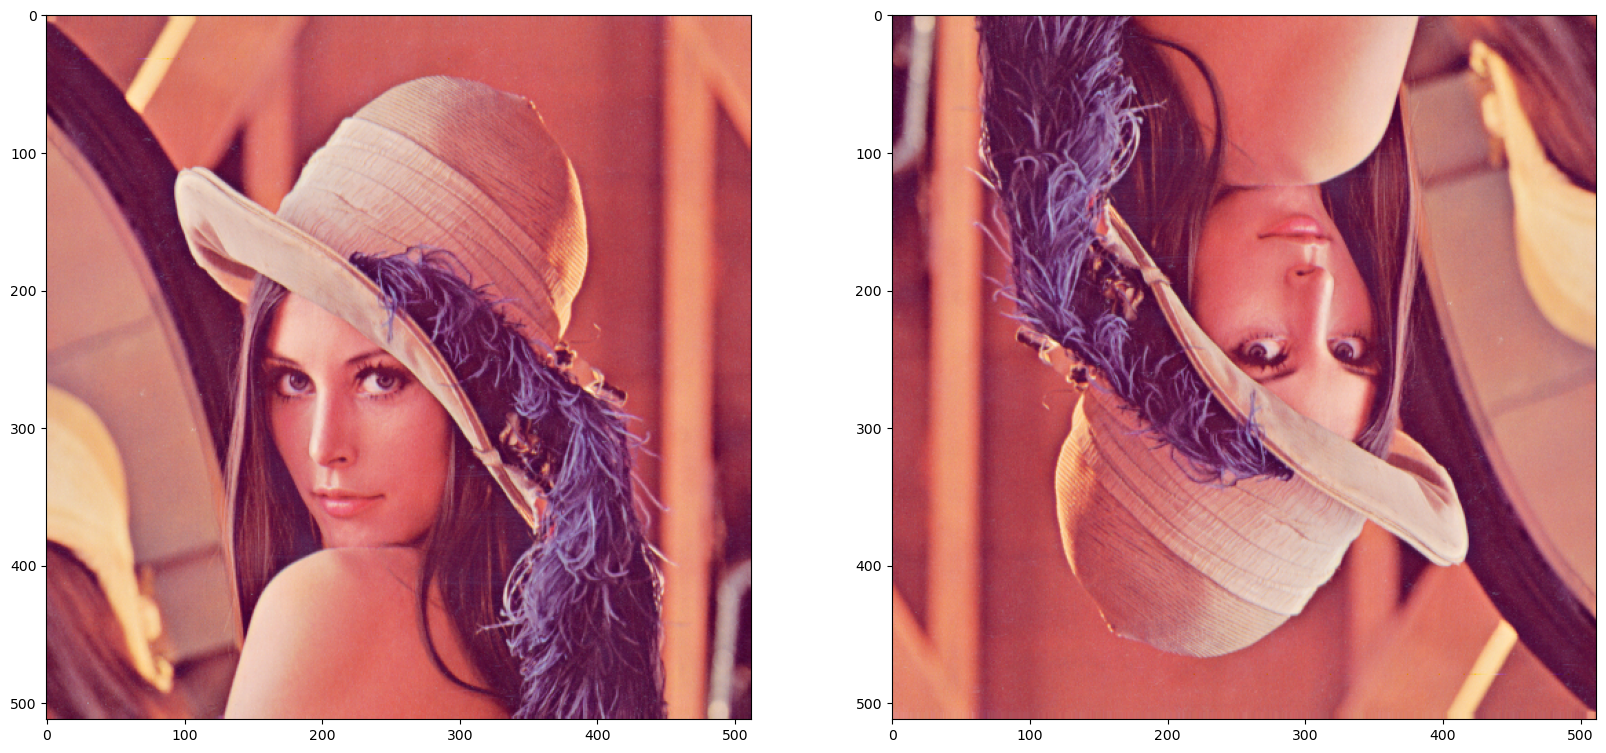

In [60]:
img_horizontal_flip = flip_image(img_2d, 1)
img_vertical_flip = flip_image(img_2d, 0)

show_image([img_horizontal_flip, img_vertical_flip])

# RGB &rarr; grayscale, RGB &rarr; sepia

In [96]:
def convert_grayscale(img_2d):
    gray_image = (0.299 * img_2d[:,:,0] + 0.587 * img_2d[:,:,1] + 0.114 * img_2d[:,:,2]).astype('uint8')
    gray_image = np.repeat(gray_image[...,None], 3, axis=-1)
    return gray_image

In [101]:
def convert_sepia(img_2d):
    new_red = 0.393 * img_2d[:,:,0] + 0.769 * img_2d[:,:,1] + 0.189 * img_2d[:,:,2]
    new_green = 0.349 * img_2d[:,:,0] + 0.686 * img_2d[:,:,1] + 0.168 * img_2d[:,:,2]
    new_blue = 0.272 * img_2d[:,:,0] + 0.534 * img_2d[:,:,1] + 0.131 * img_2d[:,:,2]
    
    new_img_2d = np.stack([new_red, new_green, new_blue], axis=-1)
    new_img_2d = truncate(new_img_2d)
    return new_img_2d.astype('uint8')

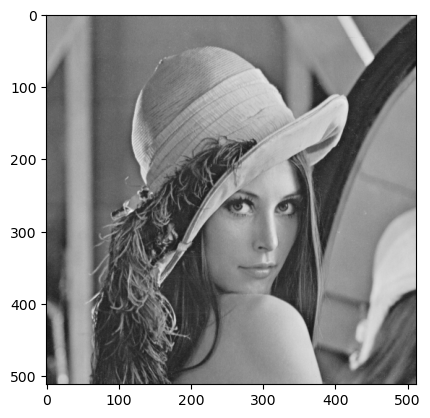

In [97]:
new_img_2d = convert_grayscale(img_2d)
plt.imshow(new_img_2d)

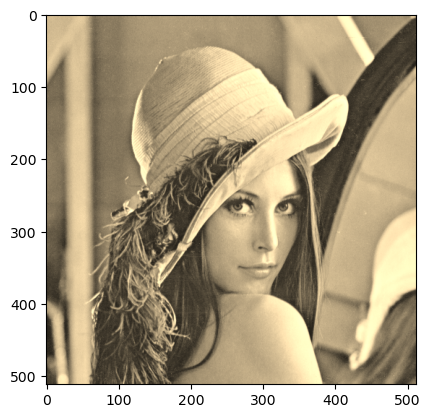

In [102]:
new_img_2d = convert_sepia(img_2d)
plt.imshow(new_img_2d)

# Làm mờ/sắc nét

In [105]:
def gaussian_blur(img_2d

# Cắt ảnh

In [114]:
def crop_image(img_2d, height, width):
    h, w = img_2d.shape[:2]
    x1 = int((w - width) / 2)
    y1 = int((h - height) / 2)
    y2 = y1 + height
    x2 = x1 + width
    return img_2d[y1:y2, x1:x2]

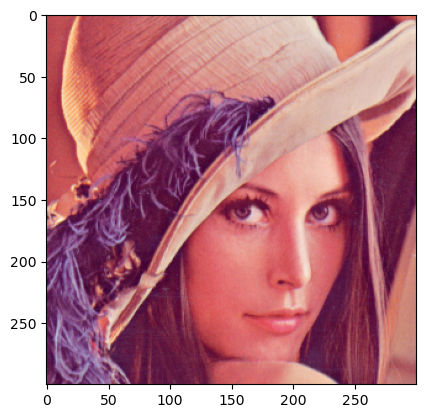

In [118]:
new_img_2d = crop_image(img_2d, 300, 300)
plt.imshow(new_img_2d)

# Cắt ảnh theo khung hình tròn

In [120]:
def circular_crop(img_2d, radius):
    black_pixels = np.zeros(img_2d.shape)
    h, w = img_2d.shape[:2]
    center = (int(w/2), int(h/2))
    
    